In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import joblib 
import os 
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

data=pd.read_csv("medical_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [74]:
data.shape

(2772, 7)

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [76]:
duplicates=data.duplicated().sum()
print(duplicates)

1435


In [55]:
data.shape

(2772, 7)

In [77]:
data=data.drop_duplicates()
print(data.shape)

(1337, 7)


In [78]:
data.duplicated().sum()

np.int64(0)

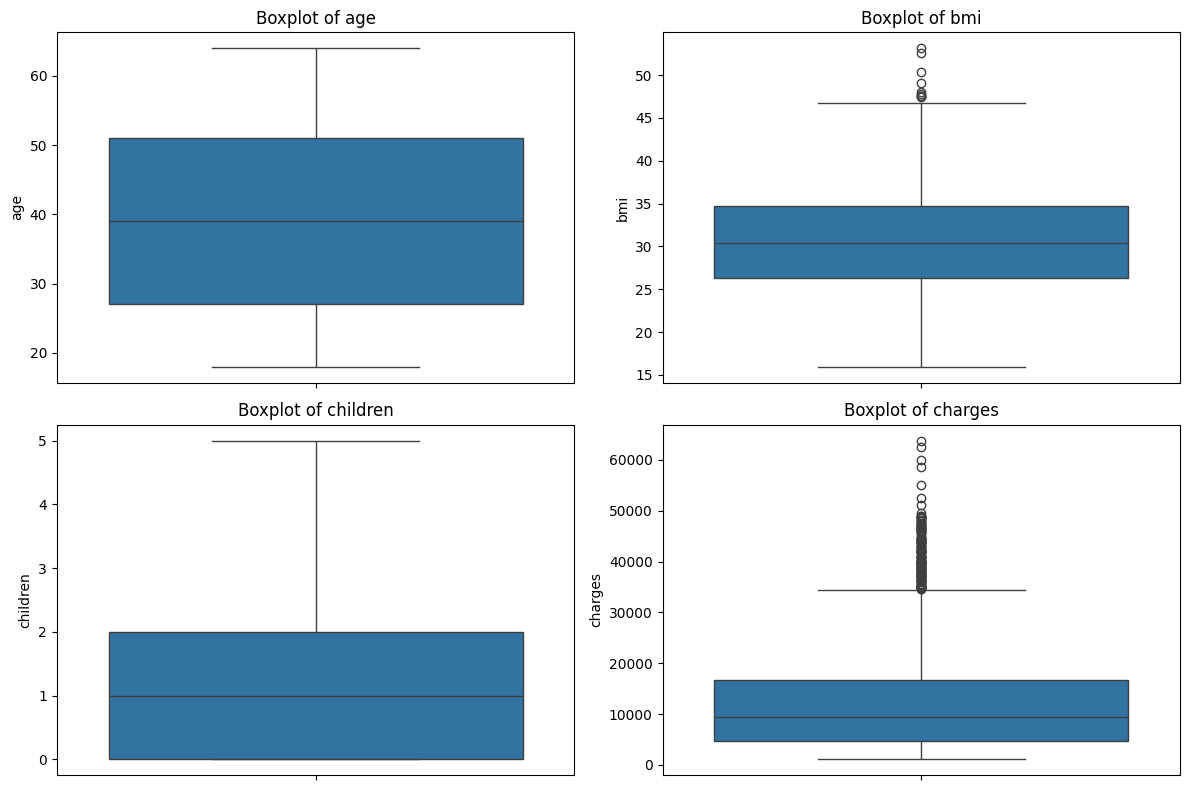

In [79]:
numerical_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

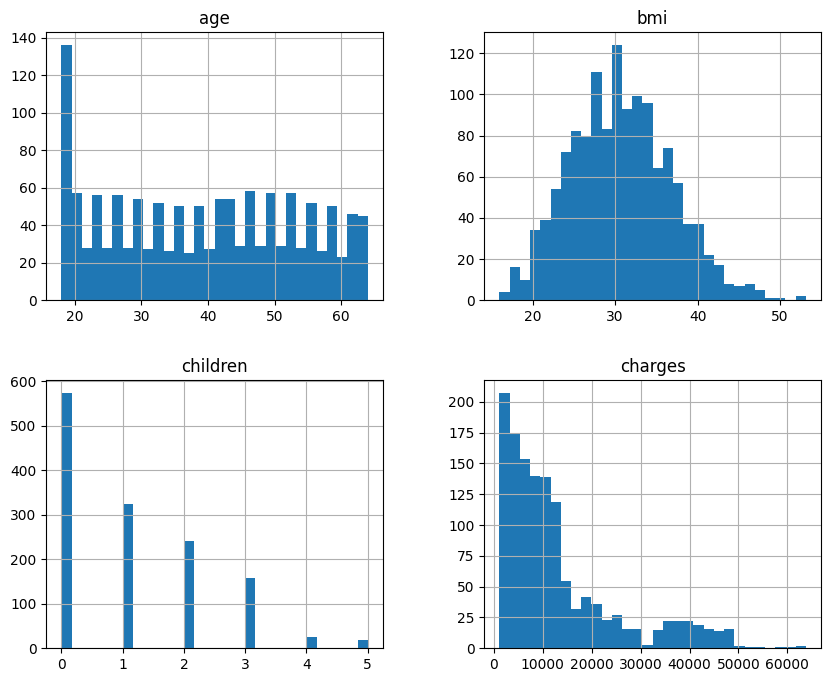

In [80]:
data[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(10, 8))
plt.show()

In [144]:
data['charges'] = np.log1p(data['charges'])

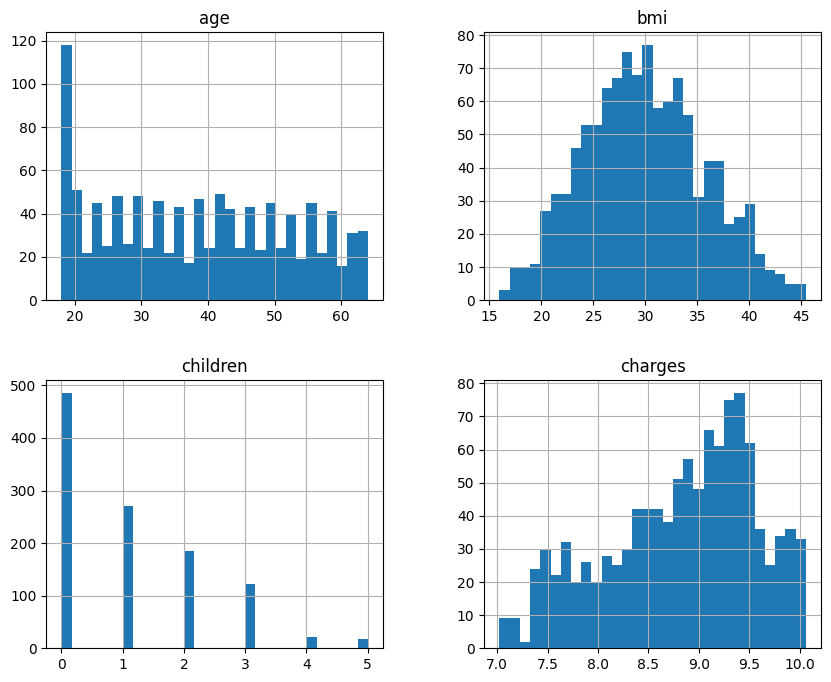

In [145]:
data[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(10, 8))
plt.show()

In [146]:
def remove_outliers_all_columns(df, columns):
    # For each column, calculate IQR and mark rows as outliers
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update df to remove rows with outliers in this column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # At the end, we reassign to ensure it modifies the original DataFrame
    return df

# Define your list of numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Remove outliers in place
data = remove_outliers_all_columns(data, numerical_columns)


In [83]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1130 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1130 non-null   int64  
 1   sex       1130 non-null   object 
 2   bmi       1130 non-null   float64
 3   children  1130 non-null   int64  
 4   smoker    1130 non-null   object 
 5   region    1130 non-null   object 
 6   charges   1130 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 70.6+ KB
None
               age          bmi     children       charges
count  1130.000000  1130.000000  1130.000000   1130.000000
mean     38.684071    29.898916     1.085841   9003.313866
std      13.858011     5.801437     1.218645   5917.811761
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.740000     0.000000   4262.099450
50%      39.000000    29.640000     1.000000   8024.901025
75%      50.000000    33.725000     2.000000  12235.336400
max     

In [92]:
data.shape

(1103, 7)

### 1. Analyse Univariée


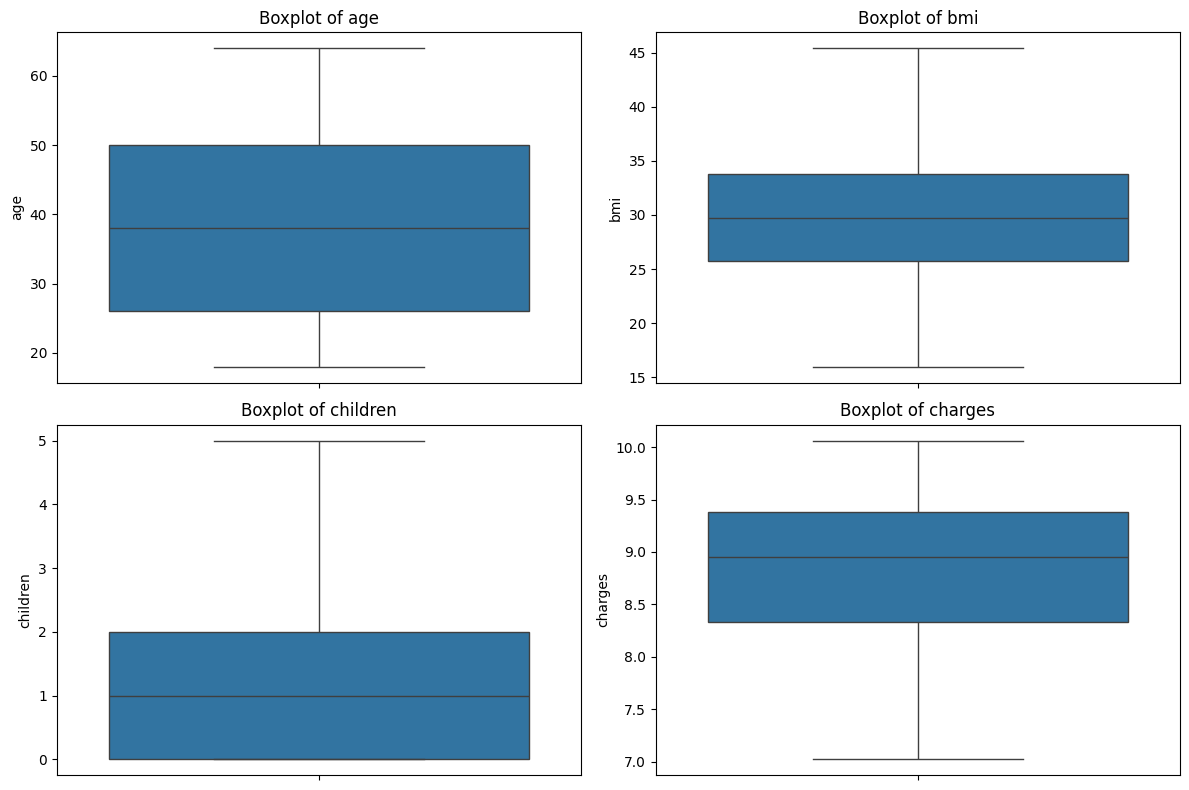

In [147]:
numerical_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

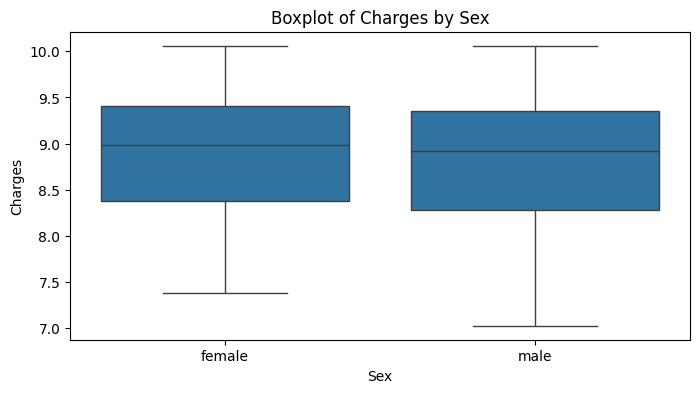

In [148]:
plt.figure(figsize=(8,4))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Boxplot of Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

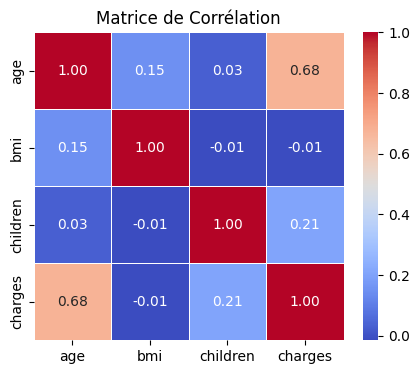

In [201]:
corr_matrix = data[['age', 'bmi', 'children', 'charges']].corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

### 2. Analyse Bivariée

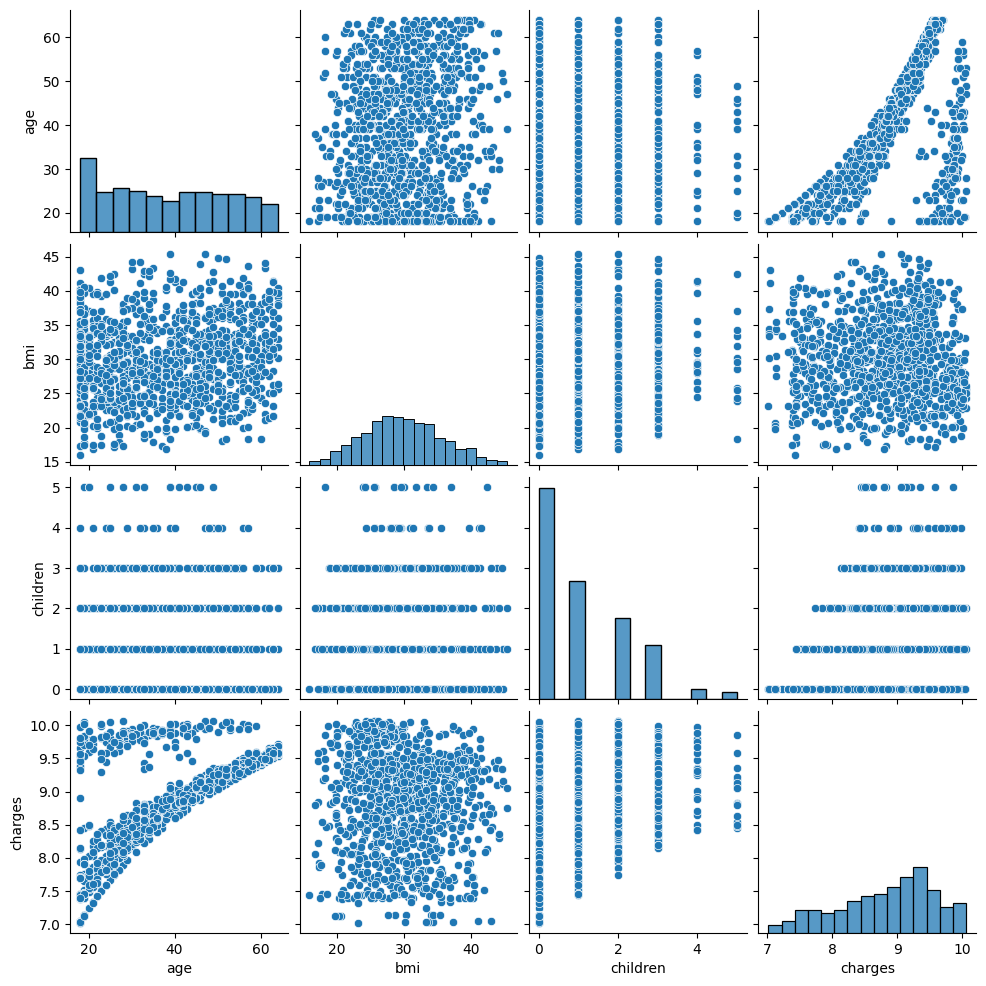

In [204]:
sns.pairplot(data[['age', 'bmi', 'children', 'charges']])
plt.show()

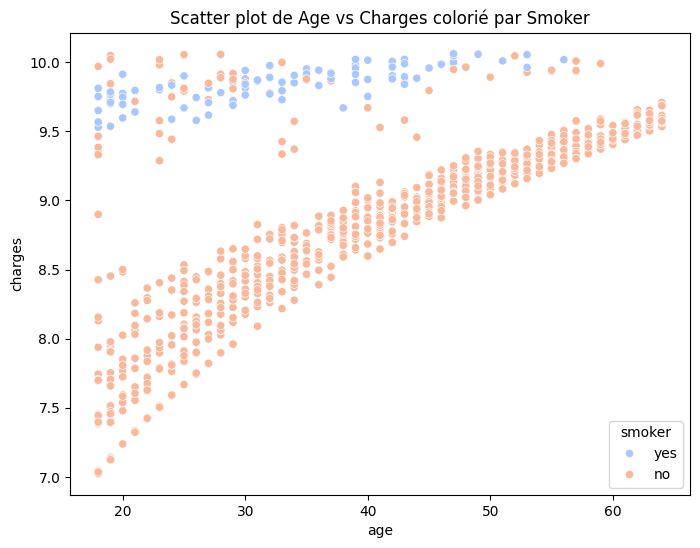

In [206]:
# Scatter plot de 'age' vs 'charges', colorié par 'smoker'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data, palette='coolwarm')
plt.title('Scatter plot de Age vs Charges colorié par Smoker')
plt.show()

### Variables qualitatifs 

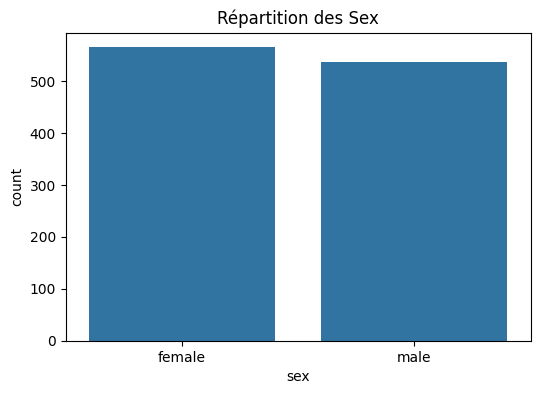

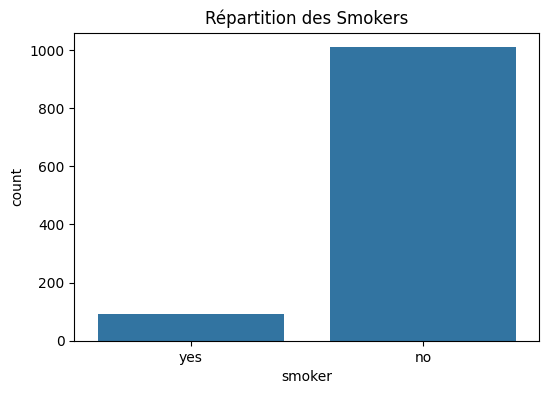

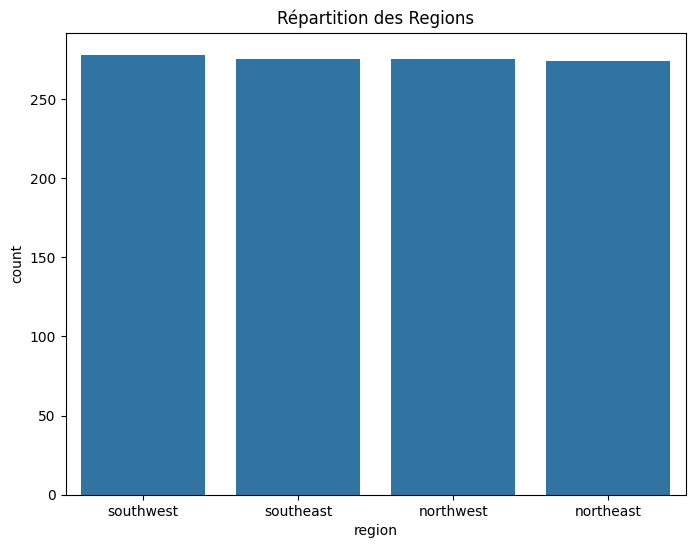

In [207]:
# Barplot pour la variable 'sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=data)
plt.title('Répartition des Sex')
plt.show()

# Barplot pour la variable 'smoker'
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=data)
plt.title('Répartition des Smokers')
plt.show()

# Barplot pour la variable 'region'
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=data)
plt.title('Répartition des Regions')
plt.show()


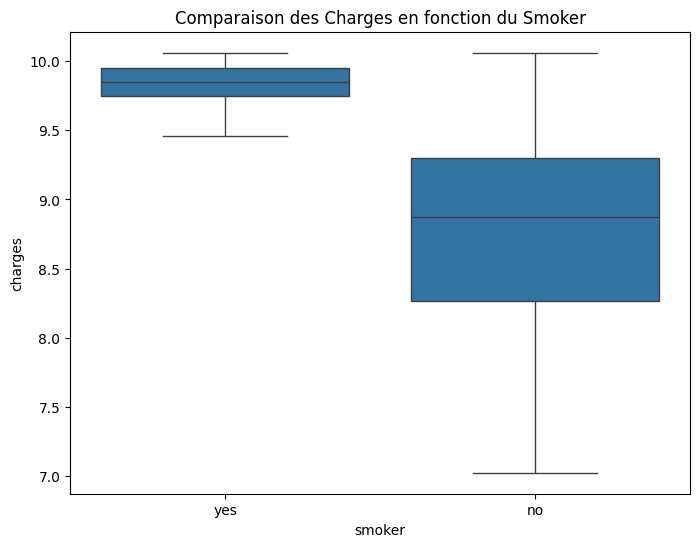

In [208]:
# Boxplot pour comparer les 'charges' en fonction de 'smoker'
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Comparaison des Charges en fonction du Smoker')
plt.show()

Boxplot pour comparer les 'charges' en fonction du sexe

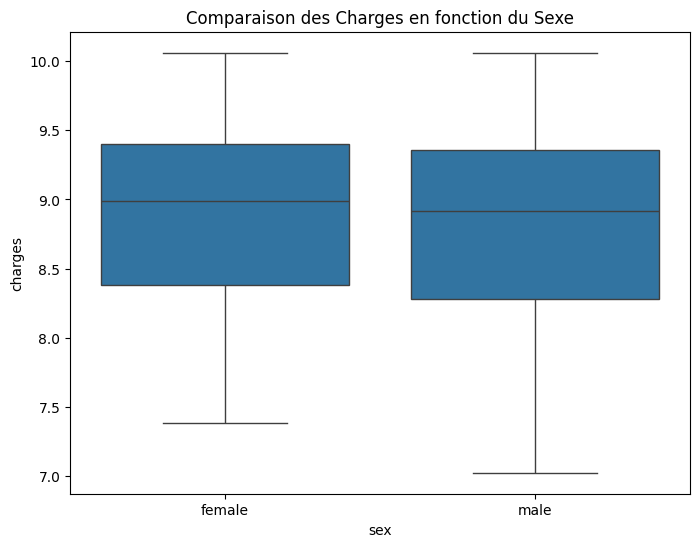

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Comparaison des Charges en fonction du Sexe')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
y = data["charges"]
x = data.drop(["charges"], axis=1)
# Définir les colonnes catégorielles et numériques
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

In [ ]:
x_encoded = pd.get_dummies(x, columns=['sex', 'smoker', 'region'], drop_first=True)

In [ ]:
x_encoded.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [ ]:
binary_data=x_encoded[["smoker_yes","sex_male","region_northwest","region_southeast","region_southwest"]]
non_binary_data=x_encoded.drop(columns=["smoker_yes", "sex_male", "region_northwest", "region_southeast", "region_southwest"])

In [ ]:
Scaler=StandardScaler()
xs=Scaler.fit_transform(non_binary_data) 
xs_scaled=pd.DataFrame(xs,columns=non_binary_data.columns,index=non_binary_data.index)
xs_scaled.head()

,age,bmi,children
0,-1.403617,-0.352420,-0.882959
1,-1.475732,0.655975,-0.059760
2,-0.754586,0.523698,1.586638
3,-0.394013,-1.244859,-0.882959
4,-0.466127,-0.184068,-0.882959


In [ ]:
joblib.dump(Scaler,"scaler.pkl")

['scaler.pkl']

In [ ]:
Xs_final = pd.concat([xs_scaled, binary_data], axis=1)
print(Xs_final.head())

        age       bmi  children  smoker_yes  sex_male  region_northwest  \
0 -1.403617 -0.352420 -0.882959        True     False             False   
1 -1.475732  0.655975 -0.059760       False      True             False   
2 -0.754586  0.523698  1.586638       False      True             False   
3 -0.394013 -1.244859 -0.882959       False      True              True   
4 -0.466127 -0.184068 -0.882959       False      True              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [ ]:
x_train, x_test,y_train,y_test=train_test_split(Xs_final,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(881, 8)
(221, 8)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
Xs_final.columns

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
model.coef_

array([ 0.53344781,  0.02972287,  0.1353082 ,  1.38952861, -0.08876942,
       -0.06457389, -0.18793144, -0.1581304 ])

In [ ]:
model.intercept_

np.float64(8.861038280195269)

In [ ]:
pred=model.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
print(MSE)
print(R2_score)

0.08701935506933185
0.7963044015934954


Text(0, 0.5, 'predicted values')

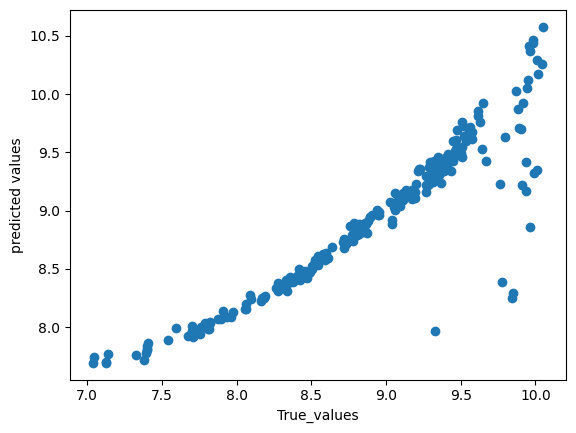

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel("True_values")
plt.ylabel("predicted values")

In [ ]:
model1=Ridge()

In [ ]:
# Préciser les valeurs de lambda à tester 
nb_va=300
# donne des valeurs entre 10^(-3) et 10^(2)
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

In [ ]:
model1=Ridge()

In [ ]:
grid=GridSearchCV(model1,lambda_range,scoring="neg_mean_squared_error",
                  cv=5)

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-03, 2....
       4.12462638e+01, 4.28654141e+01, 4.45481252e+01, 4.62968923e+01,
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [ ]:
grid.best_params_

{'alpha': np.float64(0.42210263201568987)}

In [ ]:
model1=Ridge(alpha=0.42210263201568987)
model1.fit(x_train,y_train)

Ridge(alpha=0.42210263201568987)

In [ ]:
print(x_train.columns)
print(model1.coef_)

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
[ 0.53295258  0.02895364  0.13519165  1.37977039 -0.08853184 -0.06382082
 -0.1863729  -0.15702259]


In [ ]:
print(model1.intercept_)

8.860831528730106


In [ ]:
pred2=model1.predict(x_test)
MSE=mean_squared_error(pred2,y_test)
R2_score=r2_score(pred2,y_test)
print(MSE.round(2))
print(R2_score)

0.09
0.7952679708361032


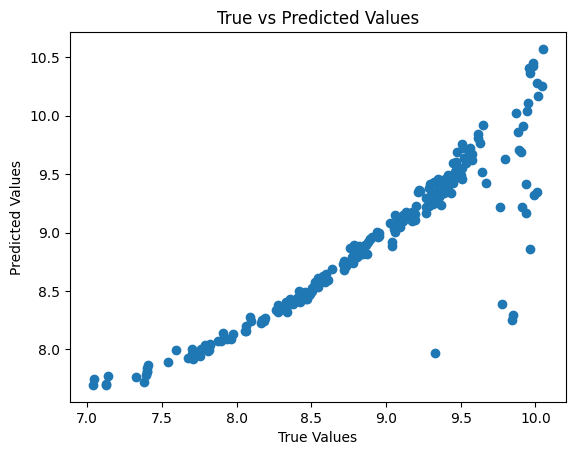

In [ ]:
plt.scatter(y_test, pred2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [ ]:
nb_va=300
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

In [ ]:
model2=Lasso()
grid=GridSearchCV(model2,lambda_range,scoring='neg_mean_squared_error',cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-03, 2....
       4.12462638e+01, 4.28654141e+01, 4.45481252e+01, 4.62968923e+01,
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [ ]:
grid.best_params_

{'alpha': np.float64(0.001)}

In [ ]:
model2=Lasso(alpha=0.001)
model2.fit(x_train,y_train)

Lasso(alpha=0.001)

In [ ]:
print(x_train.columns)
print(model2.coef_)

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
[ 0.53233327  0.02647989  0.1340376   1.37312936 -0.08452034 -0.04847556
 -0.16973864 -0.14144334]


In [ ]:
print(model2.intercept_)

8.847436318608457


In [ ]:
pred3=model2.predict(x_test)
MSE=mean_squared_error(pred3,y_test)
R2_score=r2_score(pred3,y_test)
print(MSE.round(2))
print(R2_score)

0.09
0.794058406861682


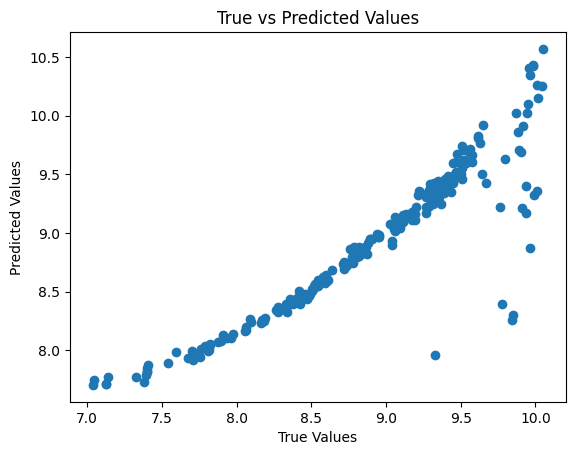

In [ ]:
plt.scatter(y_test, pred3)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [ ]:
nb_val=300 # nbr de valeurs à tester 
lambda_range=np.logspace(-3,2,nb_val) # valeurs de lambda à tester
rho_range=[0.1,0.01,0.001]    # valeurs de rho à tester  
hpers={"alpha":lambda_range,"l1_ratio":rho_range} 

In [ ]:
model3=ElasticNet()
grid=GridSearchCV(model3,hpers,cv=5,scoring="neg_mean_squared_error")

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-...
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02]),
                         'l1_ratio': [0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

In [ ]:
grid.best_params_

{'alpha': np.float64(0.001), 'l1_ratio': 0.001}

In [ ]:
model3=ElasticNet(alpha=0.001,l1_ratio=0.001)

In [ ]:
model3.fit(x_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [ ]:
print(model3.coef_)
print(model3.intercept_)

[ 0.53241819  0.02812927  0.13506509  1.36931893 -0.08827208 -0.06300306
 -0.18469276 -0.15582364]
8.860598725968732


In [ ]:
pred4=model3.predict(x_test)
MSE=mean_squared_error(pred4,y_test)
R2_score=r2_score(pred4,y_test)
MSE.round(2)
print(MSE)
R2_score

0.08686438040434691


0.7941069149907916

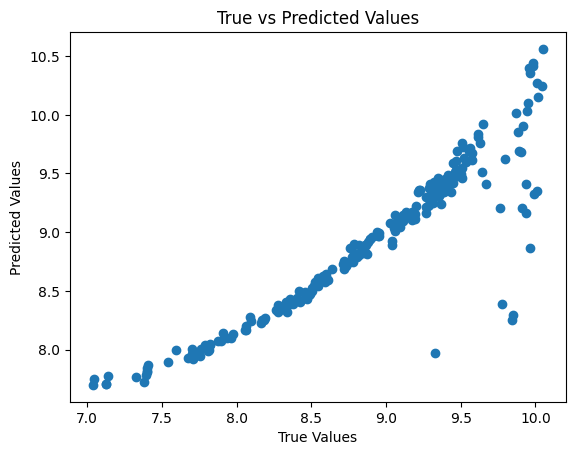

In [ ]:
plt.scatter(y_test, pred4)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [ ]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
scaler = joblib.load('scaler.pkl')
scaler.feature_names_in_

array(['age', 'bmi', 'children'], dtype=object)